Write a Hello world chat application using open AI langchain

#### steps
1. import relevant langchain modules
2. Load the .env file and Read the openai key
3. Initialise the gpt 3.5 model
4. load the model in chat mode
5. Input text that requires translation
6. print the response


In [1]:
import os
import openai
from dotenv import load_dotenv

load_dotenv()
openai.api_key = os.getenv('OPENAI_API_KEY')

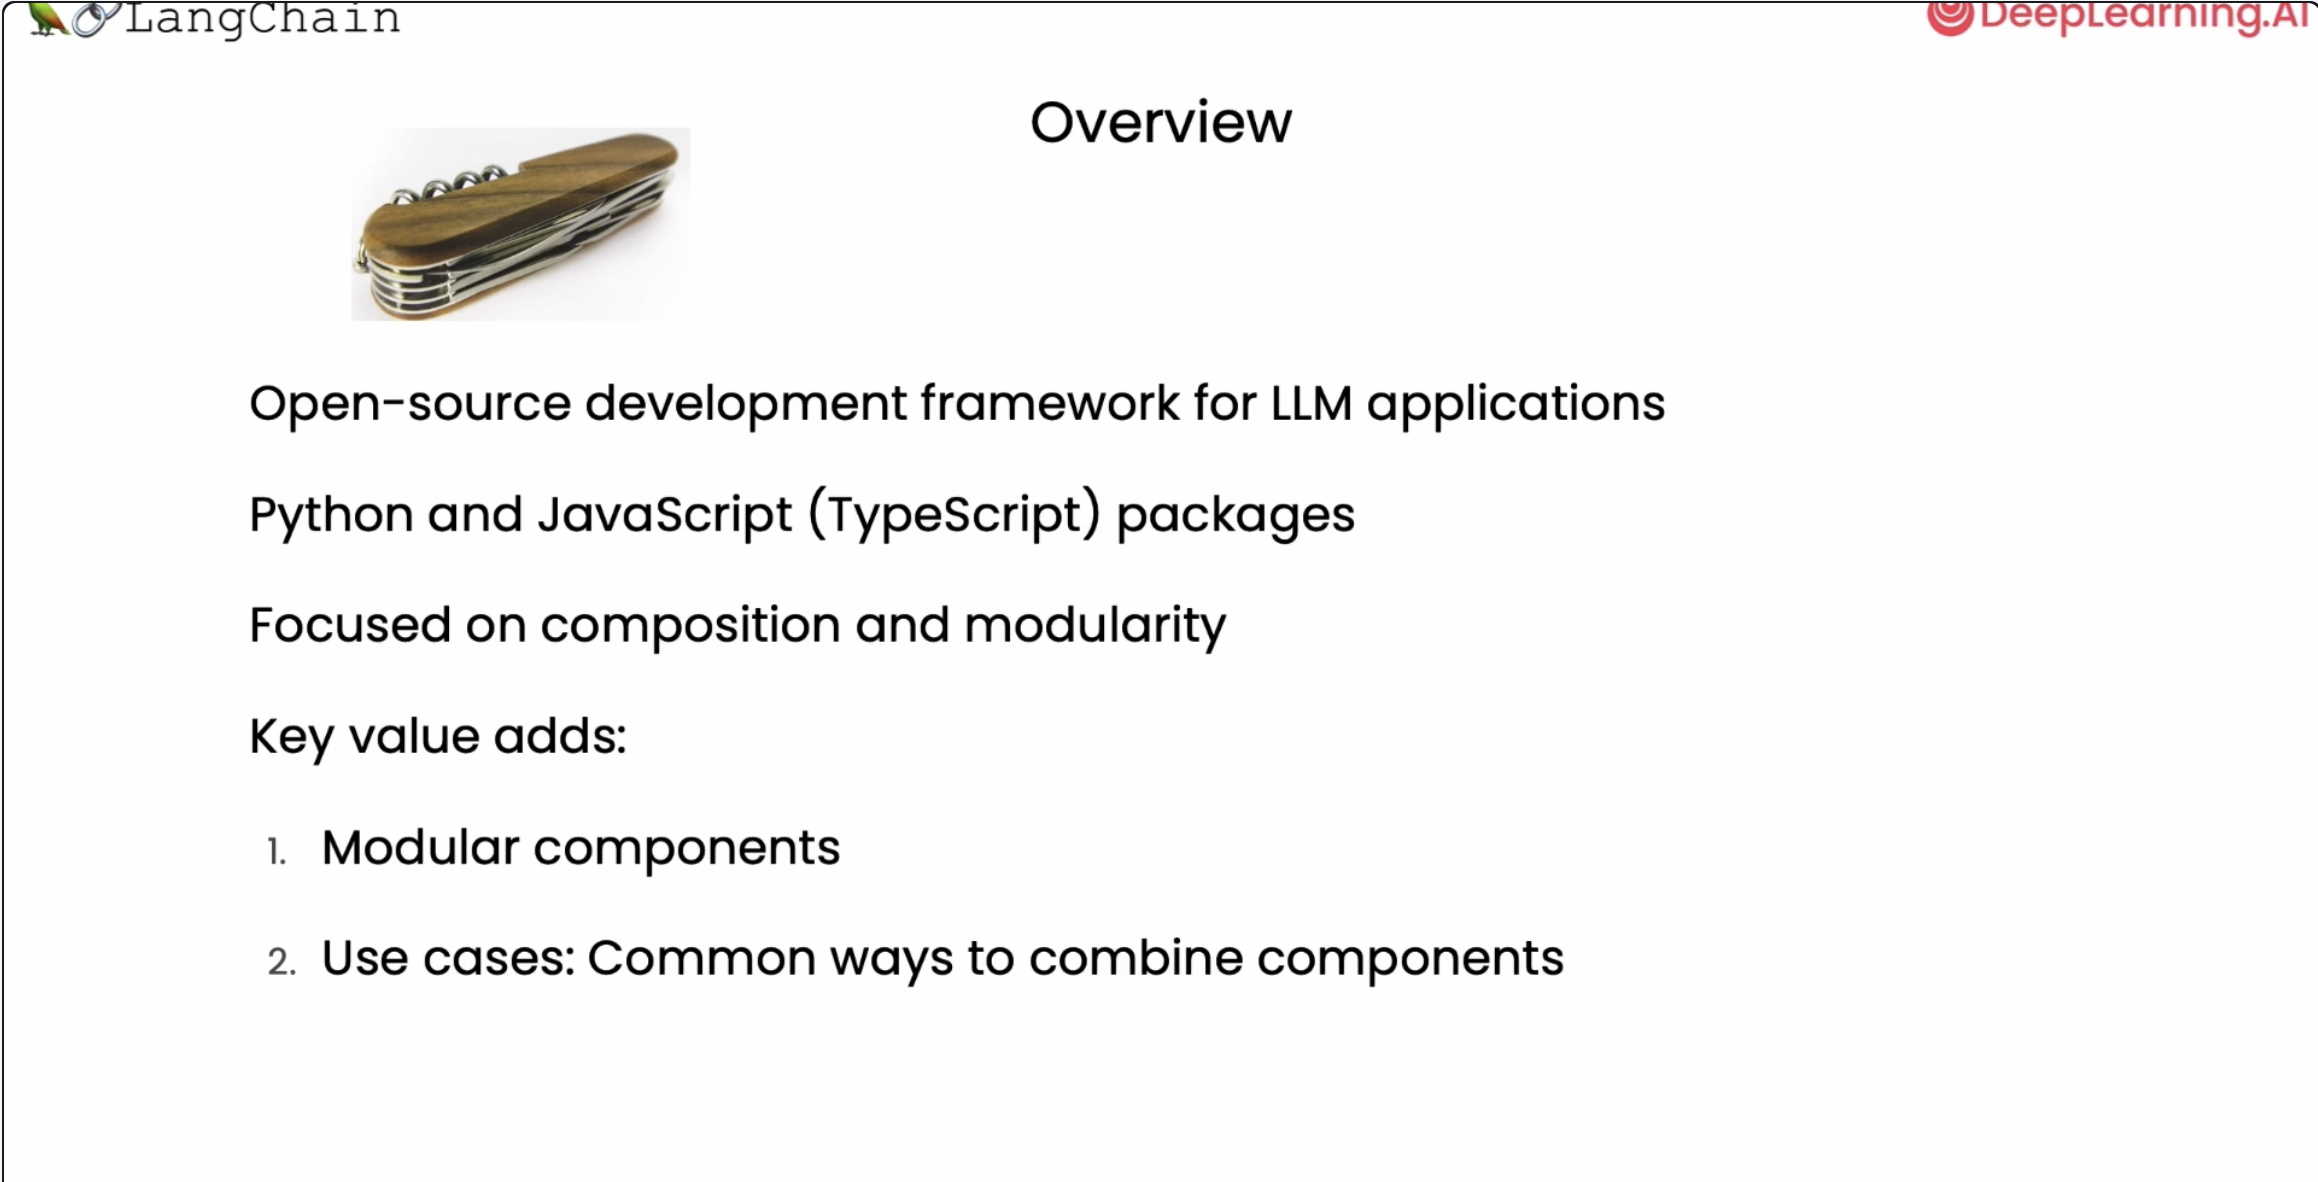

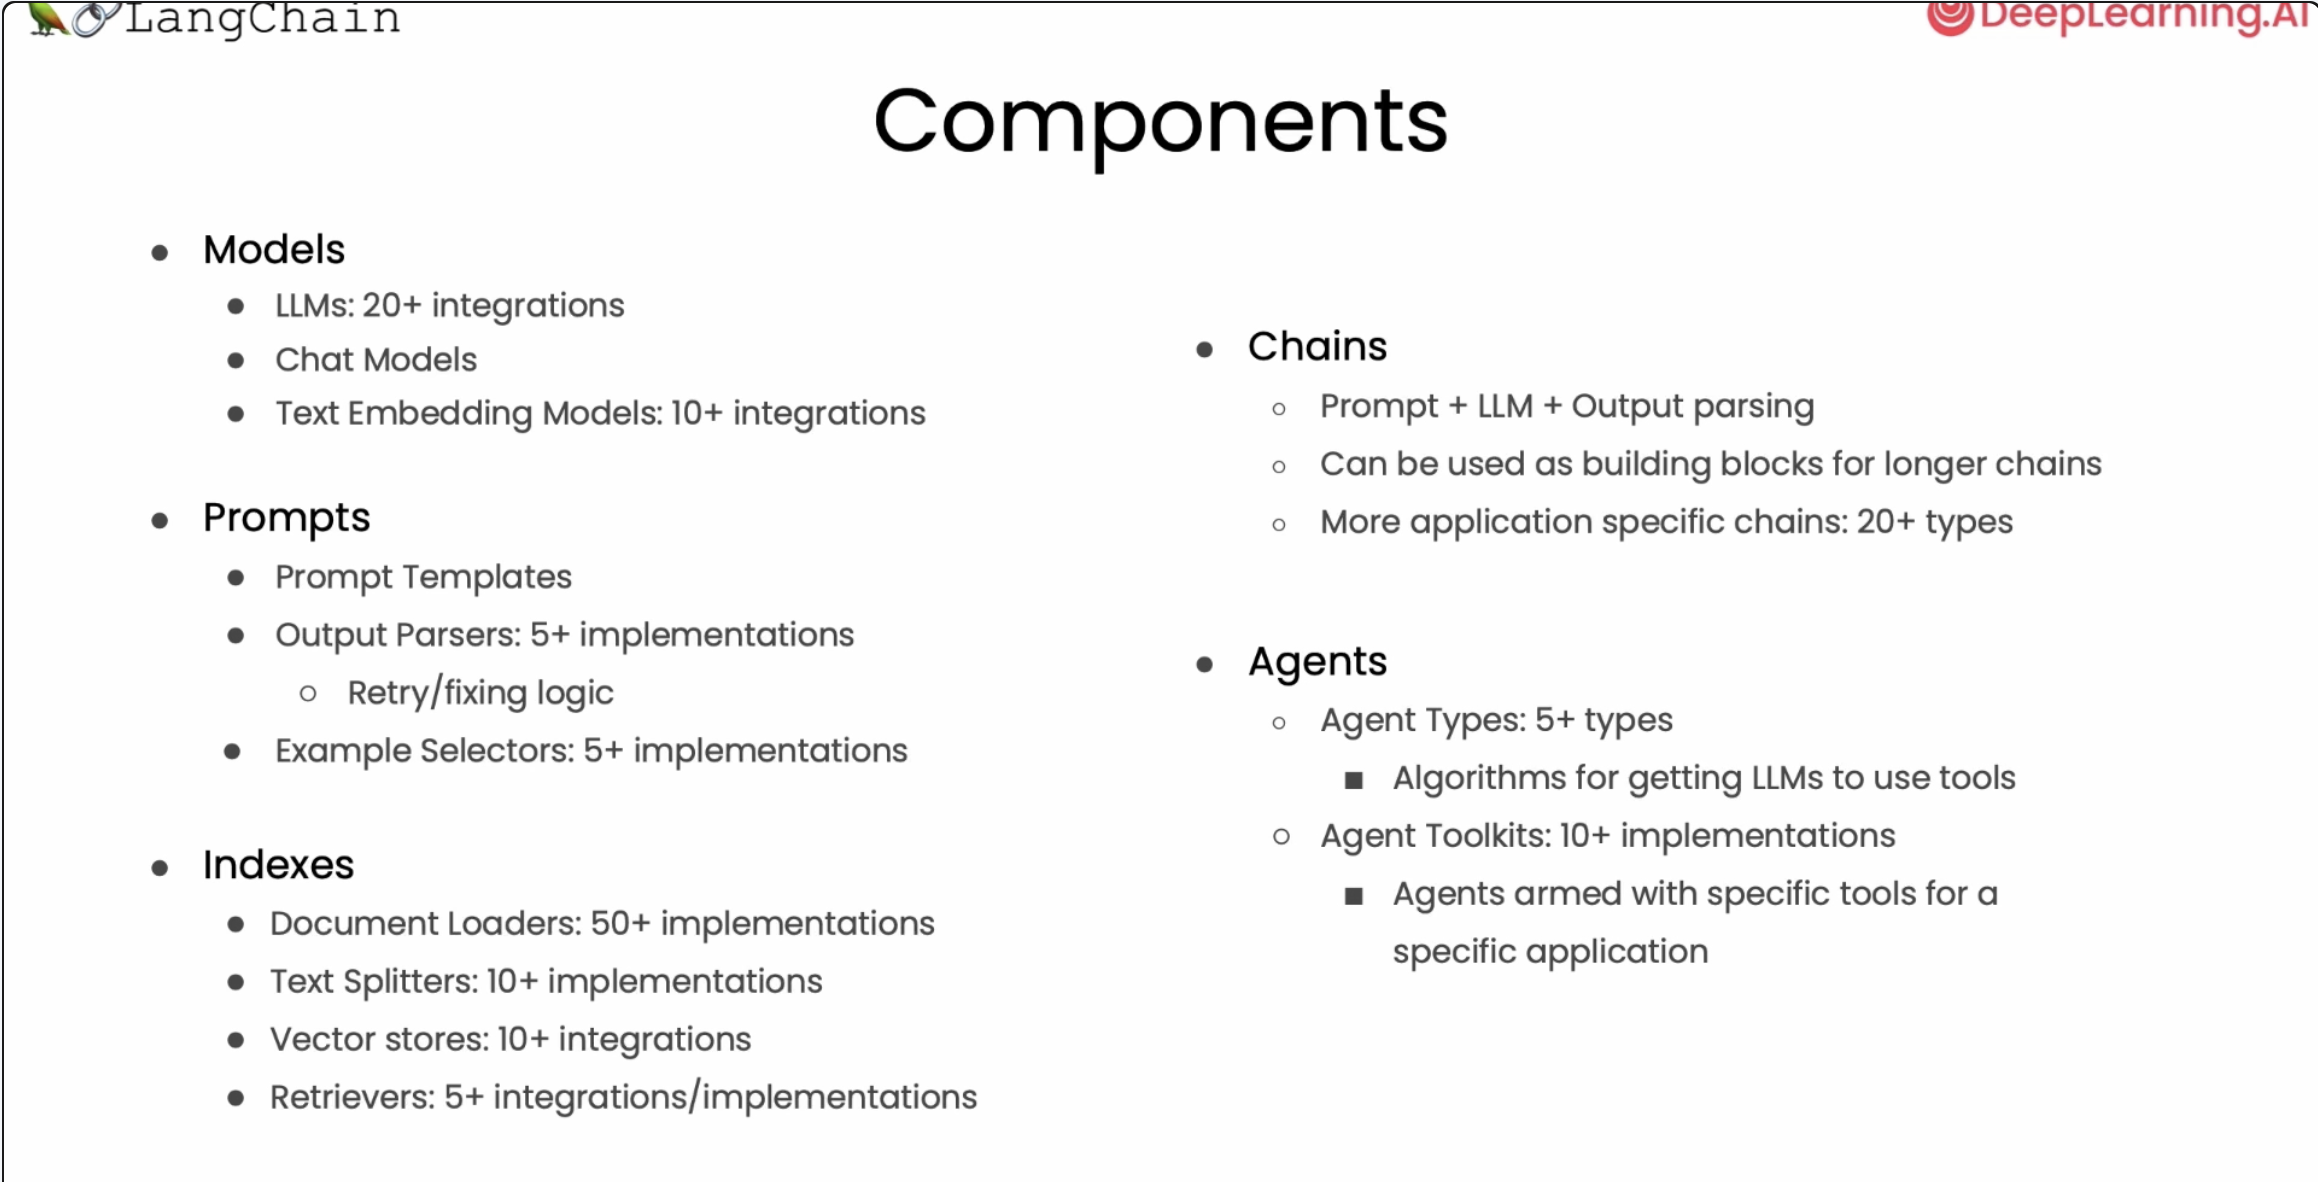

1. models : represents language models underpining a lot of them

2. prompts : refers to the style of creating inputs to pass into the models

3. parsers : involves taking output from these models and parsing it into a more structured format

Langchain provides an abstraction

In [6]:
from langchain_openai import ChatOpenAI
from langchain.prompts.chat import ChatPromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate
import json

llm = 'gpt-3.5-turbo'
input_text = 'I want to be an AI Engineer'
target_language='Marathi'

chat = ChatOpenAI(temperature=0.0,model=llm)

# Define the system message prompt
system_message = SystemMessagePromptTemplate.from_template(
    "You are a helpful assistant capable of translating text into different languages."
)

# Define the human message prompt
human_message = HumanMessagePromptTemplate.from_template(
    "Translate the following text into {target_language}.\nText: {input_text}\nRespond with translated_text only."
)

# Create the chat prompt template
chat_prompt = ChatPromptTemplate.from_messages([system_message, human_message])

# Format the prompt with inputs
formatted_prompt = chat_prompt.format_messages(
    input_text=input_text, target_language=target_language
)

# Get the response from the model
response = chat.invoke(formatted_prompt)
response.content 


'मला AI इंजिनिअर बनायचं आहे.'

#### Lesson 1 : Use of Models,Prompts & Parsers

In [8]:
from langchain.chat_models import ChatOpenAI
llm_model = "gpt-3.5-turbo"

In [ ]:
chat = ChatOpenAI(temperature=0.0, model=llm_model)

#### Prompt Template

In [10]:
template_string = """Translate the text \
that is delimited by triple backticks \
into a style that is {style}. \
text: ```{text}```
"""

In [11]:
from langchain.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(template_string)


In [12]:
prompt_template.messages[0].prompt.input_variables

['style', 'text']

In [13]:
customer_style = """American English \
in a calm and respectful tone
"""

In [14]:
customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse, \
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

In [15]:
customer_messages = prompt_template.format_messages(
                    style=customer_style,
                    text=customer_email)

In [16]:
print(type(customer_messages))
print(type(customer_messages[0]))

<class 'list'>
<class 'langchain_core.messages.human.HumanMessage'>


In [17]:
print(customer_messages[0])

content="Translate the text that is delimited by triple backticks into a style that is American English in a calm and respectful tone\n. text: ```\nArrr, I be fuming that me blender lid flew off and splattered me kitchen walls with smoothie! And to make matters worse, the warranty don't cover the cost of cleaning up me kitchen. I need yer help right now, matey!\n```\n" additional_kwargs={} response_metadata={}


In [18]:
# Call the LLM to translate to the style of the customer message
customer_response = chat(customer_messages)

In [19]:
print(customer_response.content)

Oh man, I'm really frustrated that my blender lid flew off and made a mess of my kitchen walls with smoothie! And on top of that, the warranty doesn't cover the cost of cleaning up my kitchen. I could really use your help right now, friend.


In [20]:
service_reply = """Hey there customer, \
the warranty does not cover \
cleaning expenses for your kitchen \
because it's your fault that \
you misused your blender \
by forgetting to put the lid on before \
starting the blender. \
Tough luck! See ya!
"""

In [21]:
service_style_pirate = """\
a polite tone \
that speaks in English Pirate\
"""

In [22]:
service_messages = prompt_template.format_messages(
    style=service_style_pirate,
    text=service_reply)

print(service_messages[0].content)

Translate the text that is delimited by triple backticks into a style that is a polite tone that speaks in English Pirate. text: ```Hey there customer, the warranty does not cover cleaning expenses for your kitchen because it's your fault that you misused your blender by forgetting to put the lid on before starting the blender. Tough luck! See ya!
```



In [23]:
service_response = chat(service_messages)
print(service_response.content)

Ahoy there, valued customer! Regrettably, the warranty be not coverin' the cost o' cleanin' yer galley due to yer own negligence. Ye see, 'twas yer own doin' that ye forgot to secure the lid afore startin' the blender. 'Tis a tough break, indeed! Fare thee well, matey!


#### Output Parsers

Lets start with defining how we would like the LLM output to look like

In [24]:
{
  "gift": False,
  "delivery_days": 5,
  "price_value": "pretty affordable!"
}

{'gift': False, 'delivery_days': 5, 'price_value': 'pretty affordable!'}

In [25]:
customer_review = """\
This leaf blower is pretty amazing.  It has four settings:\
candle blower, gentle breeze, windy city, and tornado. \
It arrived in two days, just in time for my wife's \
anniversary present. \
I think my wife liked it so much she was speechless. \
So far I've been the only one using it, and I've been \
using it every other morning to clear the leaves on our lawn. \
It's slightly more expensive than the other leaf blowers \
out there, but I think it's worth it for the extra features.
"""

review_template = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product \
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

Format the output as JSON with the following keys:
gift
delivery_days
price_value

text: {text}
"""

In [26]:
from langchain.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(review_template)
print(prompt_template)

input_variables=['text'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['text'], input_types={}, partial_variables={}, template='For the following text, extract the following information:\n\ngift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.\n\ndelivery_days: How many days did it take for the product to arrive? If this information is not found, output -1.\n\nprice_value: Extract any sentences about the value or price,and output them as a comma separated Python list.\n\nFormat the output as JSON with the following keys:\ngift\ndelivery_days\nprice_value\n\ntext: {text}\n'), additional_kwargs={})]


In [27]:
messages = prompt_template.format_messages(text=customer_review)
chat = ChatOpenAI(temperature=0.0, model=llm_model)
response = chat(messages)
print(response.content)

{
  "gift": true,
  "delivery_days": 2,
  "price_value": "It's slightly more expensive than the other leaf blowers out there"
}


In [28]:
type(response.content)

str

In [ ]:
# You will get an error by running this line of code 
# because'gift' is not a dictionary
# 'gift' is a string
response.content.get('gift')

#### Parse the LLM output string into a Python dictionary

In [29]:
from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser
from langchain.output_parsers import JsonOutputToolsParser

In [30]:
gift_schema = ResponseSchema(name="gift",
                             description="Was the item purchased\
                             as a gift for someone else? \
                             Answer True if yes,\
                             False if not or unknown.")
delivery_days_schema = ResponseSchema(name="delivery_days",
                                      description="How many days\
                                      did it take for the product\
                                      to arrive? If this \
                                      information is not found,\
                                      output -1.")
price_value_schema = ResponseSchema(name="price_value",
                                    description="Extract any\
                                    sentences about the value or \
                                    price, and output them as a \
                                    comma separated Python list.")

response_schemas = [gift_schema, 
                    delivery_days_schema,
                    price_value_schema]

In [31]:
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)

In [32]:
format_instructions = output_parser.get_format_instructions()

In [33]:
print(format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"gift": string  // Was the item purchased                             as a gift for someone else?                              Answer True if yes,                             False if not or unknown.
	"delivery_days": string  // How many days                                      did it take for the product                                      to arrive? If this                                       information is not found,                                      output -1.
	"price_value": string  // Extract any                                    sentences about the value or                                     price, and output them as a                                     comma separated Python list.
}
```


In [34]:
review_template_2 = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product\
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

text: {text}

{format_instructions}
"""

prompt = ChatPromptTemplate.from_template(template=review_template_2)

messages = prompt.format_messages(text=customer_review, 
                                format_instructions=format_instructions)

In [35]:
print(messages[0].content)

For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the productto arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,and output them as a comma separated Python list.

text: This leaf blower is pretty amazing.  It has four settings:candle blower, gentle breeze, windy city, and tornado. It arrived in two days, just in time for my wife's anniversary present. I think my wife liked it so much she was speechless. So far I've been the only one using it, and I've been using it every other morning to clear the leaves on our lawn. It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features.


The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```

In [36]:
response = chat(messages)

In [37]:
print(response.content)

```json
{
	"gift": true,
	"delivery_days": 2,
	"price_value": ["It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."]
}
```
